In [4]:
!pip install yfinance



In [5]:
import yfinance as yf


In [11]:

import pandas as pd

# Define the ticker symbols
tickers = ["AAPL", "PYPL", "TSLA", "NVDA", "AMD", "META", "INTC"]

# Start and end dates for the data
start_date = '2010-01-01'
end_date = '2024-01-01'

# Initialize an empty DataFrame to hold the close prices
close_prices = pd.DataFrame()

# Fetch the historical closing prices for each ticker
for ticker in tickers:
    data = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
    close_prices[ticker] = data  # Appends the close price column with the ticker as the column name

# Ensure all data have the same dates
close_prices = close_prices.dropna(how='any')

print(close_prices)


                                 AAPL       PYPL        TSLA       NVDA  \
Date                                                                      
2015-07-06 00:00:00-04:00   28.351793  36.709999   18.648001   0.488292   
2015-07-07 00:00:00-04:00   28.282040  36.619999   17.858667   0.479093   
2015-07-08 00:00:00-04:00   27.579998  34.700001   16.997334   0.475704   
2015-07-09 00:00:00-04:00   27.017460  34.500000   17.194668   0.469894   
2015-07-10 00:00:00-04:00   27.739756  34.689999   17.276667   0.478125   
...                               ...        ...         ...        ...   
2023-12-22 00:00:00-05:00  193.091385  61.840000  252.539993  48.823704   
2023-12-26 00:00:00-05:00  192.542816  62.560001  256.609985  49.272640   
2023-12-27 00:00:00-05:00  192.642548  62.680000  261.440002  49.410622   
2023-12-28 00:00:00-05:00  193.071426  63.080002  253.179993  49.515610   
2023-12-29 00:00:00-05:00  192.024185  61.410000  248.479996  49.515610   

                        

In [12]:
# Convert the index to datetime 
if not isinstance(close_prices.index, pd.DatetimeIndex):
    close_prices.index = pd.to_datetime(close_prices.index)

# Normalize the date format to 'YYYY-MM-DD' without time and time zone
close_prices.index = close_prices.index.normalize()

#  remove timezone info and just keep the date
close_prices.index = close_prices.index.tz_localize(None)

# The DataFrame 'close_prices' now has dates formatted as 'YYYY-MM-DD'
print(close_prices.tail())

                  AAPL       PYPL        TSLA       NVDA         AMD  \
Date                                                                   
2023-12-22  193.091385  61.840000  252.539993  48.823704  139.600006   
2023-12-26  192.542816  62.560001  256.609985  49.272640  143.410004   
2023-12-27  192.642548  62.680000  261.440002  49.410622  146.070007   
2023-12-28  193.071426  63.080002  253.179993  49.515610  148.759995   
2023-12-29  192.024185  61.410000  248.479996  49.515610  147.410004   

                  META       INTC  
Date                               
2023-12-22  352.665314  47.666107  
2023-12-26  354.102325  50.148716  
2023-12-27  357.096191  50.406906  
2023-12-28  357.585205  50.039482  
2023-12-29  353.234131  49.900455  


In [13]:
# Calculate Returns
returns_daily = close_prices.pct_change().dropna()
print(returns_daily.head())



                AAPL      PYPL      TSLA      NVDA       AMD      META  \
Date                                                                     
2015-07-07 -0.002460 -0.002452 -0.042328 -0.018840 -0.153846 -0.003769   
2015-07-08 -0.024823 -0.052430 -0.048231 -0.007074 -0.038277 -0.018000   
2015-07-09 -0.020397 -0.005764  0.011610 -0.012214 -0.014925  0.002685   
2015-07-10  0.026734  0.005507  0.004769  0.017516 -0.010101  0.024103   
2015-07-13  0.019306  0.060248  0.011615  0.006582  0.000000  0.024446   

                INTC  
Date                  
2015-07-07 -0.004660  
2015-07-08 -0.013378  
2015-07-09 -0.019322  
2015-07-10  0.008296  
2015-07-13  0.019198  


In [14]:

#Create a DataFrame contains data from the first dat of each month
monthly_df = returns_daily.resample('BMS').first().dropna()
print(monthly_df.head())

                AAPL      PYPL      TSLA      NVDA       AMD      META  \
Date                                                                     
2015-07-01 -0.002460 -0.002452 -0.042328 -0.018840 -0.153846 -0.003769   
2015-08-03 -0.023578  0.017829 -0.023145  0.017043  0.139896  0.001383   
2015-09-01 -0.044697 -0.035143 -0.041877 -0.040925 -0.055249 -0.024600   
2015-10-01 -0.006528  0.014175 -0.034300 -0.019473  0.011628  0.011680   
2015-11-02  0.014059  0.027215  0.033151  0.011632  0.033019  0.013141   

                INTC  
Date                  
2015-07-01 -0.004660  
2015-08-03  0.003454  
2015-09-01 -0.025228  
2015-10-01 -0.004645  
2015-11-02  0.007384  


In [16]:
# Calculate Returns monthly

returns_monthly = monthly_df.pct_change().dropna()
print(returns_monthly.tail())

                AAPL       PYPL      TSLA      NVDA        AMD       META  \
Date                                                                        
2023-08-01 -0.450737  -1.186302 -1.344896 -2.810525   0.668219  -4.856162   
2023-09-01 -2.979379  -5.433445  1.129487  2.608078   0.261327  -0.871630   
2023-10-02  0.752892  -0.899123 -1.108902 -2.720716  -0.875955  12.296048   
2023-11-01  0.263101  -2.579957  3.351499  0.284503  21.129939   0.594971   
2023-12-01 -0.637577 -14.101955 -1.216948 -1.002823  -0.980400  -1.202803   

                 INTC  
Date                   
2023-08-01  -0.844193  
2023-09-01  48.879237  
2023-10-02  -1.060518  
2023-11-01  -9.549371  
2023-12-01  -1.992262  


In [17]:
# Monthly variance and covariance of stocks (difficult)
covariances = {} #create an empty dict

for i in returns_monthly.index:

    # Gather all dates in each month of each year by using booleans
    # loop through return_MONTHLY.index while boolean judgement  on return_DAILY.index
    Dates_in_a_Month = (returns_daily.index.month == i.month) & (returns_daily.index.year == i.year)

    # Calcuate the cov between stocks in each month based on their daily returns within the month  
    covariances[i] = returns_daily[Dates_in_a_Month].cov()  # see an example of df.cov() function below 
    
    print(i, '\n', covariances[i])



2015-08-03 00:00:00 
           AAPL      PYPL      TSLA      NVDA       AMD      META      INTC
AAPL  0.000755  0.000312  0.000486  0.000543 -0.000132  0.000470  0.000462
PYPL  0.000312  0.000442  0.000462  0.000438  0.000402  0.000325  0.000291
TSLA  0.000486  0.000462  0.001415  0.000401  0.000130  0.000631  0.000375
NVDA  0.000543  0.000438  0.000401  0.001376  0.000319  0.000473  0.000434
AMD  -0.000132  0.000402  0.000130  0.000319  0.002240  0.000319  0.000229
META  0.000470  0.000325  0.000631  0.000473  0.000319  0.000619  0.000385
INTC  0.000462  0.000291  0.000375  0.000434  0.000229  0.000385  0.000441
2015-09-01 00:00:00 
           AAPL      PYPL      TSLA      NVDA       AMD      META      INTC
AAPL  0.000436  0.000371  0.000310  0.000309  0.000312  0.000301  0.000195
PYPL  0.000371  0.000600  0.000332  0.000266  0.000197  0.000330  0.000205
TSLA  0.000310  0.000332  0.000386  0.000277  0.000288  0.000282  0.000171
NVDA  0.000309  0.000266  0.000277  0.000438  0.000395  

In [26]:
# Define three dicts for properties of portfolio
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

import numpy as np
for date in sorted(covariances.keys()):
  cov = covariances[date]
  rand_times = 200  # In pratice, we need thousands of weights
  for i in range(rand_times): 
    weights = np.random.random(7)  # Syntax: np.random.random(size)
                                 # Return an array of random floats in the interval [0.0, 1.0)
                                 # size is the number of random values are returned
    weights /= np.sum(weights)     # /= divides weights by their sum to normalize 
    # For a specific date and i, returns and volatility calcualted is just a single number
    returns = np.dot(weights, returns_monthly.loc[date]) 
    volatility = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) # see cell below 
    # Use the .setdefault() method to add an empty list ([]) for the current date
    # Then append value to the list
    portfolio_weights.setdefault(date, []).append(weights)
    portfolio_returns.setdefault(date, []).append(returns) 
    portfolio_volatility.setdefault(date, []).append(volatility) 

print(portfolio_weights)
print(portfolio_returns)
print(portfolio_volatility)




{Timestamp('2015-08-03 00:00:00'): [array([0.10300306, 0.03977116, 0.13023029, 0.20038107, 0.22161263,
       0.22927686, 0.07572493]), array([0.07129245, 0.05435476, 0.27467425, 0.24220424, 0.14473142,
       0.01728281, 0.19546008]), array([0.09610752, 0.06665276, 0.10969884, 0.16159558, 0.20289254,
       0.22477953, 0.13827323]), array([0.15936605, 0.21496222, 0.32049022, 0.14531329, 0.03341555,
       0.05959466, 0.06685802]), array([0.08359048, 0.30259171, 0.24336146, 0.1147485 , 0.01117682,
       0.11394808, 0.13058293]), array([0.20611337, 0.34303178, 0.00899897, 0.05648295, 0.12730338,
       0.01516259, 0.24290696]), array([0.14445147, 0.14251893, 0.25115185, 0.00749949, 0.08075312,
       0.28279911, 0.09082604]), array([0.01659389, 0.23290989, 0.03414807, 0.3069479 , 0.2042415 ,
       0.09587776, 0.10928098]), array([0.21844881, 0.09529399, 0.11826776, 0.21990007, 0.06952474,
       0.06589033, 0.21267429]), array([0.13507385, 0.1250921 , 0.00811929, 0.23006408, 0.2326676

2023-12-01 00:00:00


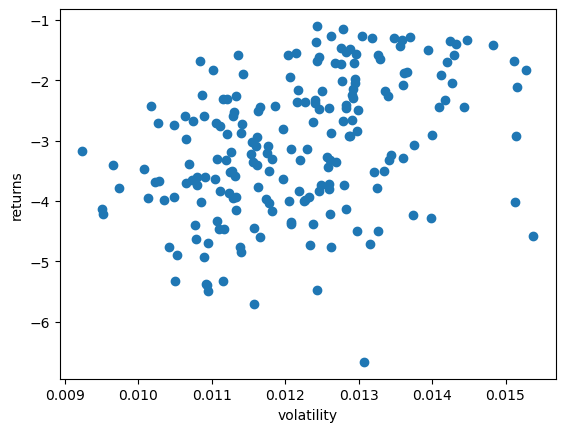

In [27]:
# plot efficient frontier for the latest first date of month
date = sorted(covariances.keys())[-1]
print(date)
# Try date = sorted(covariances.keys())[-2]
# Try generate 1000 weights for each date (i in range(1000))

import matplotlib.pyplot as plt
plt.scatter(portfolio_volatility[date], portfolio_returns[date])
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()

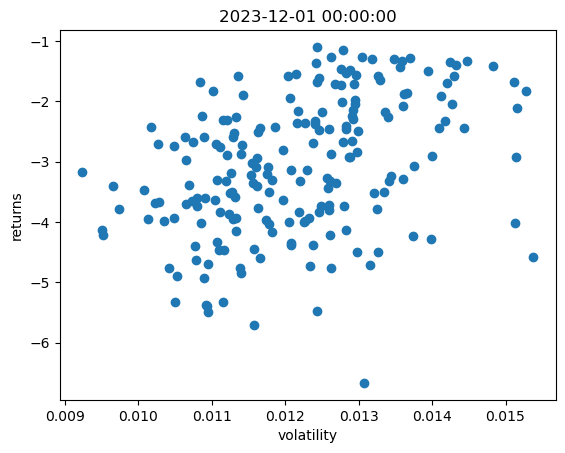

1


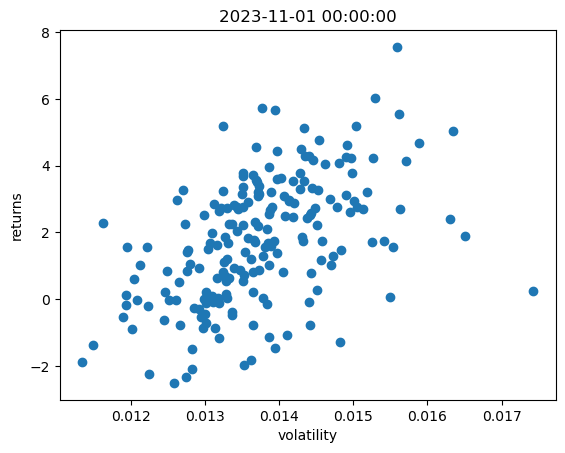

2


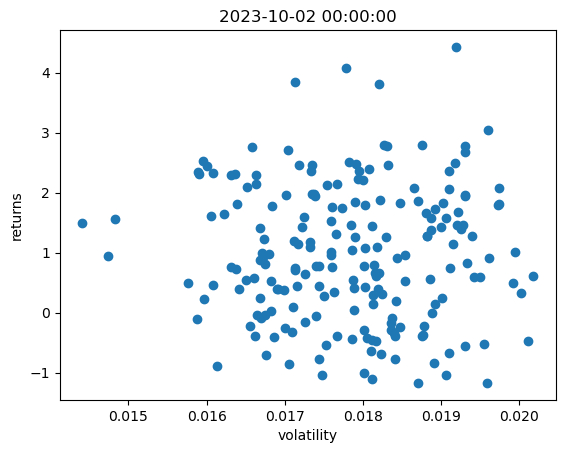

3


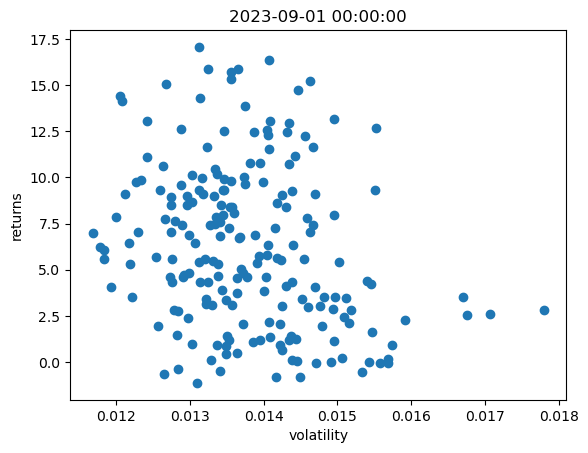

4


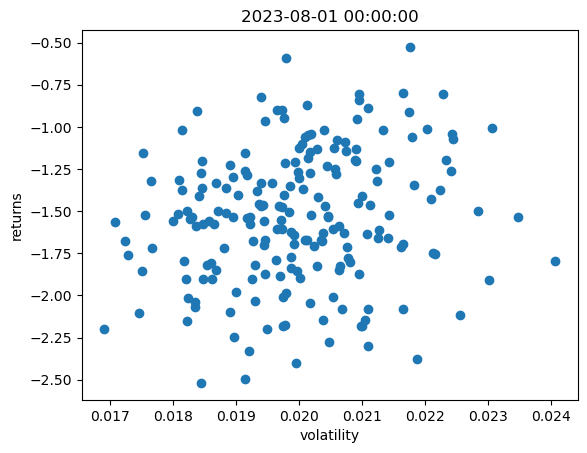

5


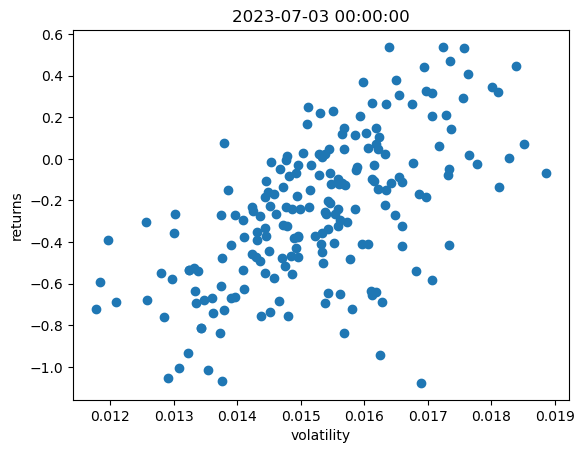

6


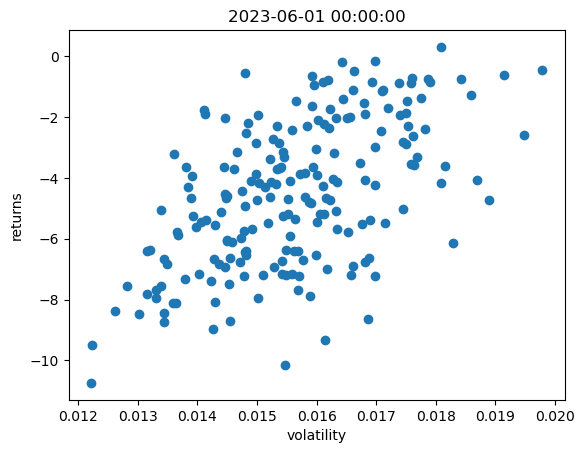

7


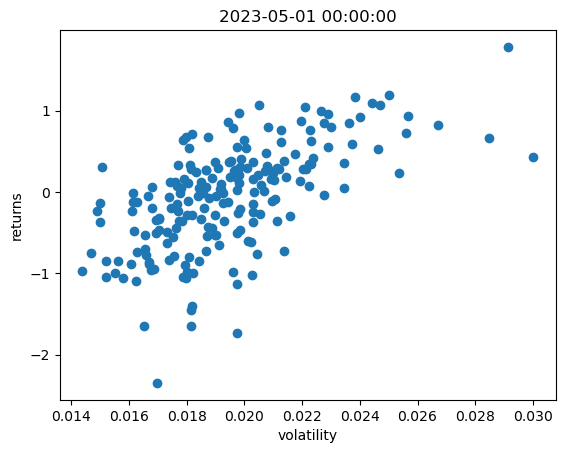

8


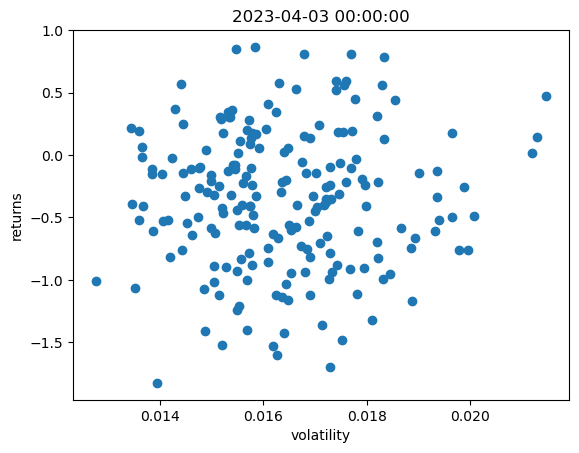

9


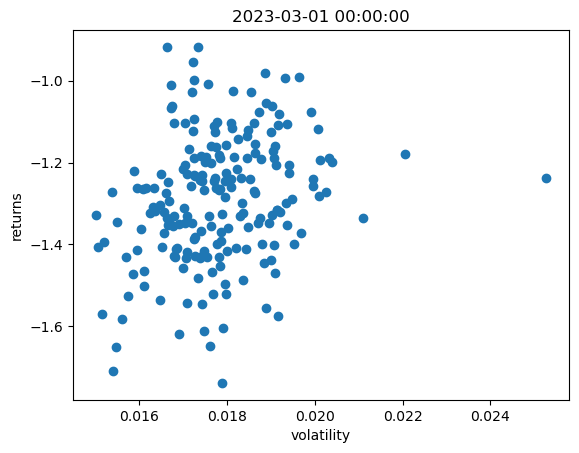

10


In [28]:
#Create Plotting functions 
import matplotlib.pyplot as plt

def plotting(Num):
  for x in range(1, Num + 1):
    date = sorted(covariances.keys())[-x]
    plt.scatter(portfolio_volatility[date], portfolio_returns[date])
    plt.title(date)
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.show()
    print(x)

##Create Plots for the lastest 5 rebalancing dates 
plotting(10)